# Introduction
The project is based on a research project MT-Diet at iMPACT Lab Arizona State University.
In this project we will be attempting to classify whether or not a user is eating or not eating using Myo Wristband data provided by Arizona State University. In this notebook we will go over the process 4 main processes that I used to accomplish this task: cleaning and preprocessing the data, performing feature extractions, reducing dimensionality of the data, and training algorithms for classification.

# Data Cleaning
The data initially needs to be formated and prepared before we can use fancy python functions or visualizations on it. 
The hierarchy of the folder setup is as follows:
- groundTruth:
   - user9
   - user10
   - user11:
         - fork:
             - 1503513662628.txt
         - spoon:
             - 1503514028875.txt
   - ...
- MyoData:
   - user09
   - user10
   - user11:
         - fork:
             - 1503513662628_EMG.txt
             - 1503513662628_IMU.txt
             - 1503513662628_video_info.csv
         - spoon:
             - 1503513662628_EMG.txt
             - 1503513662628_IMU.txt
             - 1503513662628_video_info.csv
   - ...
   

I like to get a sense of how my directories look like and I noticed 
It is always good to have a quick check of your dataset to make sure there isn't any weird anomolies or mistakes in them.
For instance by printing out all the files I found an extra file with the path ".\groundTruth\user12\spoon\1503515701951.txt.bak" This is important to take into account because it can lead to errors later on in the data. 

Some other mistakes that I found in the data are as follows:
- an extra tab was inserted into one the rows of the groundTruth files

Solution: I took the liberty to change the value myself because it was only one case and my implementation was already set up to work with correct data. 

- Negative spans of eating frames or end frame < start frame

Solution:

In [24]:
import os
for root, dirs, files in os.walk(".", topdown=True):
    for name in files:
        print(os.path.join(root, name))
#     for name in dirs:
#         print(os.path.join(root, name))

.\Activity_Recognition_Report.pdf
.\code.ipynb
.\DataMining_project_help.docx
.\.ipynb_checkpoints\code-checkpoint.ipynb
.\groundTruth\user10\fork\1503512024740.txt
.\groundTruth\user10\spoon\1503512621910.txt
.\groundTruth\user11\fork\1503513662628.txt
.\groundTruth\user11\spoon\1503514028875.txt
.\groundTruth\user12\fork\1503515171349.txt
.\groundTruth\user12\spoon\1503515701951.txt
.\groundTruth\user12\spoon\1503515701951.txt.bak
.\groundTruth\user13\fork\1503523593605.txt
.\groundTruth\user13\spoon\1503523878205.txt
.\groundTruth\user14\fork\1503525230880.txt
.\groundTruth\user14\spoon\1503525025300.txt
.\groundTruth\user16\fork\1503600471339.txt
.\groundTruth\user16\spoon\1503599958929.txt
.\groundTruth\user17\fork\1503601791851.txt
.\groundTruth\user17\spoon\1503602222616.txt
.\groundTruth\user18\fork\1503604387983.txt
.\groundTruth\user18\spoon\1503604109480.txt
.\groundTruth\user19\fork\1503610324174.txt
.\groundTruth\user19\spoon\1503609551913.txt
.\groundTruth\user21\fork\150

In [22]:
import pandas as pd
groundTruth = {}
for root, dirs, files in os.walk(".\groundTruth", topdown=True):
    for name in files:
        path = os.path.join(root, name)
        if name.endswith(".txt"):
            key = path.split('\\')[2:]
            key[-1] = key[-1].strip('.txt')
            key[0] = int(key[0].strip('user'))
            if (key[0] == 18 and key[1]) == 'fork' or (key[0]==25 and key[1] == 'spoon'):
                continue
            groundTruth[tuple(key)] = pd.read_csv(path, sep=",", header=None, usecols=[0,1], skipinitialspace=True, names=['startFrames','endFrames'])
            #this is how I located the file with the error
            #print(path, groundTruth[tuple(key)].dtypes)

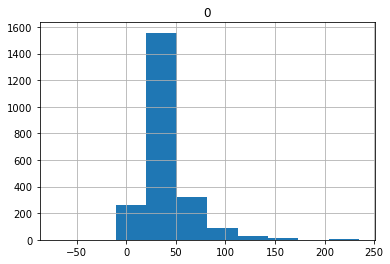

In [23]:
%matplotlib inline
frames = []
for key, df in groundTruth.items():
    frames.extend(list(df['endFrames']-df['startFrames']))
df = pd.DataFrame(frames)
df.hist();

In [8]:
for root, dirs, files in os.walk(".\MyoData", topdown=True):
    files = []
    for name in files:
        path = os.path.join(root, name)
        if name.endswith(".txt"):
            key = path.split('\\')[2:]
            key[-1] = key[-1].strip('.txt')
            key[0] = int(key[0].strip('user'))
            groundTruth[tuple(key)] = pd.read_csv(path, sep=",", header=None, usecols=[0,1], names=['startFrame','endFrame'])